In [9]:

#reference
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


R2 score: 0.16798146553221416
Coefficients: [-7.09630588e+03  2.67470366e-01  1.60222061e+03 -3.15298222e+02]


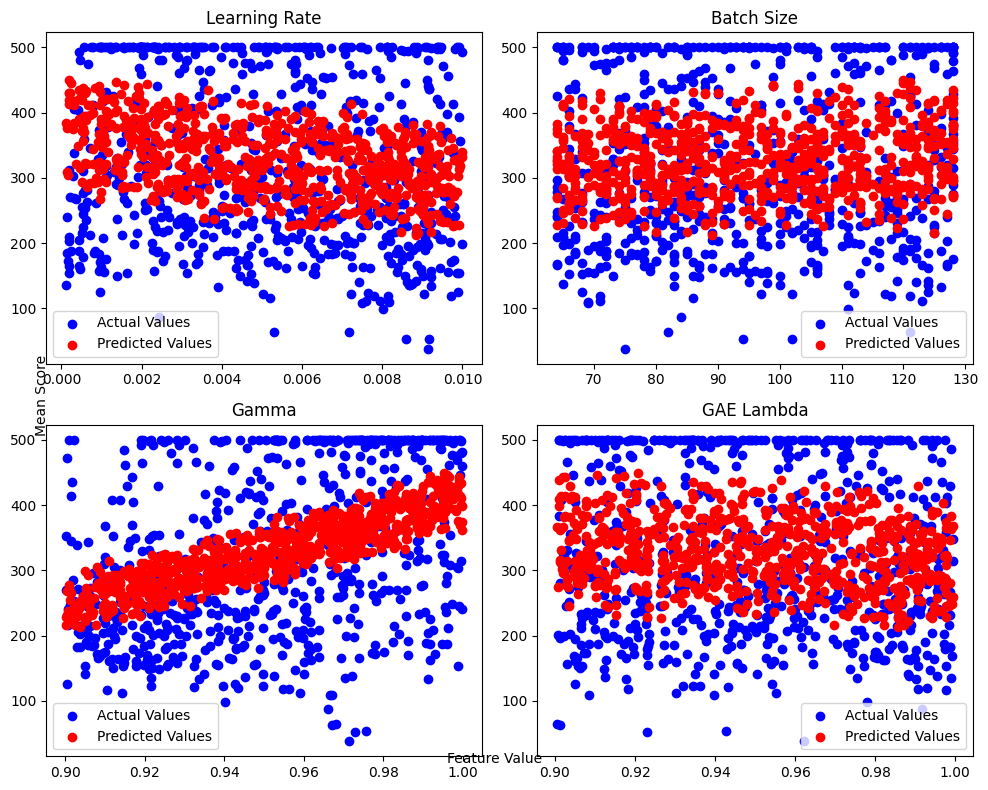

Coefficients:
Learning Rate: -7096.3058753386795
Batch Size: 0.2674703658534711
Gamma: 1602.2206106602991
GAE Lambda: -315.2982217804071


In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('CartPole-v1_PPO ALL HYPERPARAMETERS RANDOMISED AT 12500 EPISODES.csv')
X = df[['Learning Rate', 'Batch Size', 'Gamma', 'GAE Lambda']]
y = df['Mean Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train = X_train.fillna(X.mean())
y_train = y_train.fillna(y.mean())
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))

# Identify the combination of variables that leads to the best results
# This can be done by looking at the coefficients of the model
print('Coefficients:', model.coef_)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.text(0.5, 0.04, 'Feature Value', ha='center')
fig.text(0.04, 0.5, 'Mean Score', va='center', rotation='vertical')
for i, ax in enumerate(axs.flat):
    feature = X.columns[i]
    ax.scatter(X_test[feature], y_test, color='blue', label='Actual Values')
    ax.scatter(X_test[feature], y_pred, color='red', label='Predicted Values')
    ax.set_title(feature)
    ax.legend()
plt.tight_layout()
plt.show()



coefficients = dict(zip(X.columns, model.coef_))
print('Coefficients:')
for variable, coefficient in coefficients.items():
    print(f'{variable}: {coefficient}')